## ANOVA Test on Sample Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_click_data = pd.read_csv('data/number_of_clicks.csv')
df_click_data.head()

,app,ip,click_date,num_clicks
0,19,53454,11/7/2017,1
1,19,4683,11/9/2017,1
2,19,140936,11/8/2017,1
3,19,56664,11/7/2017,1
4,19,252886,11/8/2017,1


In [ ]:
model = ols('num_clicks ~ click_date', data = df_click_data).fit()

In [ ]:
anova_result = sm.stats.anova_lm(model, typ=2)

In [ ]:
print(anova_result)

                  sum_sq       df          F        PR(>F)
click_date     10.170180      3.0  11.751985  1.081818e-07
Residual    14721.048469  51032.0        NaN           NaN


> The p-value of 1.081818e-07 is statistically significant at the 99% confidence level. This suggests that the sample means for number of clicks per day are different.

### Post-hoc test
> Carry out Tukey test.  Research how Tukey test works

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=df_click_data['num_clicks'], groups=df_click_data['click_date'], alpha=0.05)

group1,group2,meandiff,p-adj,lower,upper,reject
11/6/2017,11/7/2017,0.0617,0.0,0.0325,0.0909,True
11/6/2017,11/8/2017,0.0661,0.0,0.0369,0.0952,True
11/6/2017,11/9/2017,0.0548,0.0,0.0254,0.0843,True
11/7/2017,11/8/2017,0.0043,0.8793,-0.0107,0.0194,False
11/7/2017,11/9/2017,-0.0069,0.6675,-0.0225,0.0087,False
11/8/2017,11/9/2017,-0.0113,0.2446,-0.0268,0.0043,False


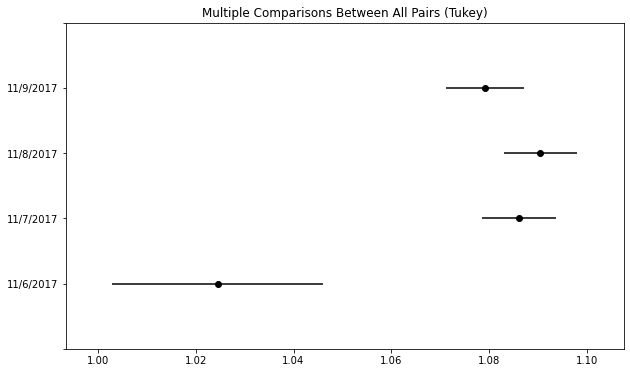

In [ ]:
# plot group confidence intervals
tukey.plot_simultaneous()
plt.vlines(x=49.5, ymin=-0.5, ymax=4.5, color="red")
tukey.summary()

> The results of the Tukey test shows the average difference and significance levels among all four days. The adjusted p-value for 11/6/2017 is statistically significant at the 99% confidence level.  This suggests the sample mean for the November 6th group is different from the other days.  The plot shows multiple comparisons of the group means at the 95% confidence interval.

> The aim of the stratified sampling was to have equal representation of click data for all four days where each day represented a single stratum. The Anova test shows a statistical difference in the mean number of clicks for the four groups. The Tukey test reveled that the 11/6/2023 group contributed to the differences in group means. So there appears to be variability in the distribution of clicks in the sample data set.

**References**

In [ ]:
https://www.kaggle.com/code/hamelg/python-for-data-26-anova/notebook

https://www.youtube.com/watch?v=EWYzeZbchR0&t=261s